In [1]:
import os
import json
from matplotlib import pyplot as plt

In [6]:
# Search for the available json files in the results folder:
rootdir = "../results/datapoints"

plot_info_files = []
for subdir, dirs, files in os.walk(rootdir):
    for file in files:
        if file.endswith(".json") and "detailed" not in file:
            plot_info_files.append(os.path.join(subdir, file))
    break

# Reading the files and storing the info in dicts: 
plot_info_nug08_1e4 = {}
plot_info_nug08_1e8 = {}
plot_info_self_1e4 = {}
plot_info_others_1e4 = {}


for file in plot_info_files:
    file_name = file.split("/")[-1].removesuffix('.json')
    
    if (file_name.startswith("nug08-3rd") and "1e-4" in file_name):
        with open(file) as json_content:
            plot_info_nug08_1e4[file_name] = json.load(json_content)
    
    if (file_name.startswith("nug08-3rd") and "1e-8" in file_name):
        with open(file) as json_content:
            plot_info_nug08_1e8[file_name] = json.load(json_content)

    if (file_name.startswith("self") and "1e-4" in file_name):
        with open(file) as json_content:
            plot_info_self_1e4[file_name] = json.load(json_content)

    if (file_name.startswith("savsched1") and "1e-4" in file_name):
        with open(file) as json_content:
            plot_info_savsched1_1e4[file_name] = json.load(json_content)
        # print("Read file", file_name)

    if (file_name.startswith("buildingenergy") and "1e-4" in file_name):
        with open(file) as json_content:
            plot_info_others_1e4[file_name] = json.load(json_content)
        print("Read file", file_name)

    if (file_name.startswith("fome13") and "1e-4" in file_name):
        with open(file) as json_content:
            plot_info_others_1e4[file_name] = json.load(json_content)
        print("Read file", file_name)

print("\nInner keys:")
print(" - iterations")
print(" - rel_duality_gap")
print(" - l2_primal_residual")
print(" - l2_dual_residual")

Read file buildingenergy_+step_size_inertial_PDHG_1e-4_m=0
Read file buildingenergy_+step_size_inertial_PDHG_1e-4_m=1
Read file buildingenergy_+step_size_inertial_PDHG_1e-4_m=2
Read file buildingenergy_+step_size_inertial_PDHG_1e-4_m=3
Read file fome13_+step_size_inertial_PDHG_1e-4_m=0
Read file fome13_+step_size_inertial_PDHG_1e-4_m=1
Read file fome13_+step_size_inertial_PDHG_1e-4_m=2
Read file fome13_+step_size_inertial_PDHG_1e-4_m=3

Inner keys:
 - iterations
 - rel_duality_gap
 - l2_primal_residual
 - l2_dual_residual


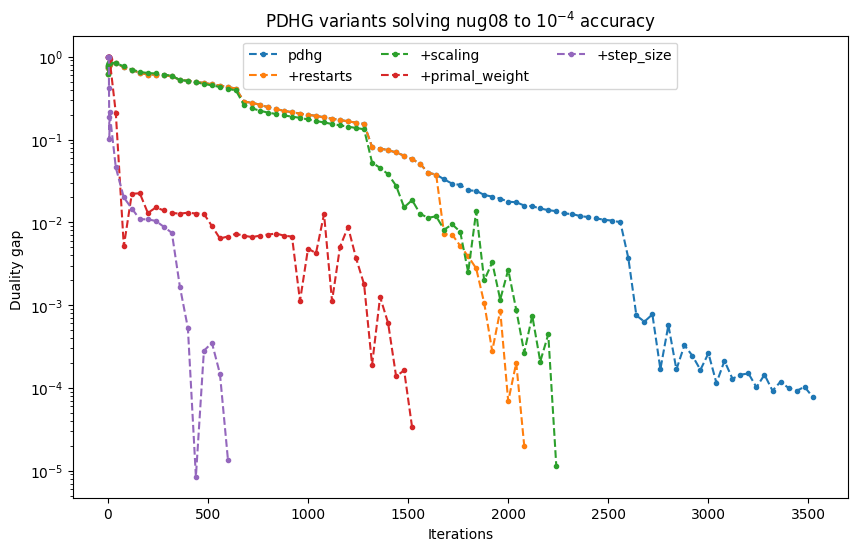

In [5]:
# Plotting the baseline convergence results for accuracy=1e-4
solve_pdhg = plot_info_nug08_1e4["nug08-3rd_baseline_pdhg_1e-4"]
solve_pdhg_restarts = plot_info_nug08_1e4["nug08-3rd_baseline_+restarts_1e-4"]
solve_pdhg_scaling = plot_info_nug08_1e4["nug08-3rd_baseline_+scaling_1e-4"]
solve_pdhg_primal_weight = plot_info_nug08_1e4["nug08-3rd_baseline_+primal_weight_1e-4"]
solve_pdhg_step_size = plot_info_nug08_1e4["nug08-3rd_baseline_+step_size_1e-4"]

plt.figure(figsize=(10, 6))
plt.plot(solve_pdhg["iterations"][1:], solve_pdhg["rel_duality_gap"][1:], ".--", label="pdhg")
plt.plot(solve_pdhg_restarts["iterations"][1:], solve_pdhg_restarts["rel_duality_gap"][1:], ".--", label="+restarts")
plt.plot(solve_pdhg_scaling["iterations"][1:], solve_pdhg_scaling["rel_duality_gap"][1:], ".--", label="+scaling")
plt.plot(solve_pdhg_primal_weight["iterations"][1:], solve_pdhg_primal_weight["rel_duality_gap"][1:], ".--", label="+primal_weight")
plt.plot(solve_pdhg_step_size["iterations"][1:], solve_pdhg_step_size["rel_duality_gap"][1:], ".--", label="+step_size")

plt.xlabel("Iterations") 
plt.ylabel("Duality gap ")
plt.yscale('log')
plt.title("PDHG variants solving nug08 to $10^{-4}$ accuracy")
plt.legend(loc="upper center", ncol=3);

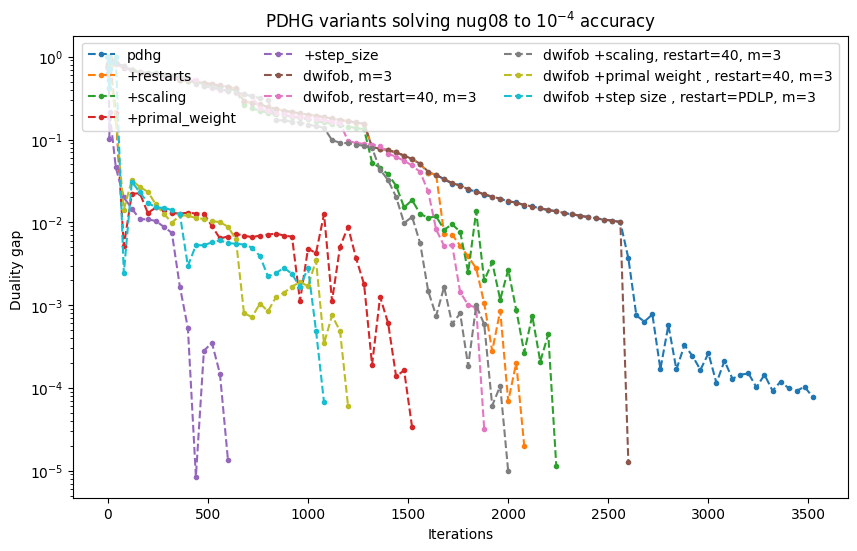

In [6]:
# Adding in the DWIFOB variants as well:
plt.figure(figsize=(10, 6))
plt.plot(solve_pdhg["iterations"][1:], solve_pdhg["rel_duality_gap"][1:], ".--", label="pdhg")
plt.plot(solve_pdhg_restarts["iterations"][1:], solve_pdhg_restarts["rel_duality_gap"][1:], ".--", label="+restarts")
plt.plot(solve_pdhg_scaling["iterations"][1:], solve_pdhg_scaling["rel_duality_gap"][1:], ".--", label="+scaling")
plt.plot(solve_pdhg_primal_weight["iterations"][1:], solve_pdhg_primal_weight["rel_duality_gap"][1:], ".--", label="+primal_weight")
plt.plot(solve_pdhg_step_size["iterations"][1:], solve_pdhg_step_size["rel_duality_gap"][1:], ".--", label="+step_size")

# We only select the best performing DWIFOB variant for each improvement, to reduce clutter: 
# Often this is the one with m=3 or m=4, which indicates that this is a reasonable choice of m for this problem size.
# Vanilla dwifob: 
solve_dwifob_m3 = plot_info_nug08_1e4["nug08-3rd_dwifob_1e-4_m=3"]
plt.plot(solve_dwifob_m3["iterations"][1:], solve_dwifob_m3["rel_duality_gap"][1:], ".--", label="dwifob, m=3")

# The best (? fastest in seconds) restart version of dwifob: constant restarts every 40 iterations, and m=3.
solve_dwifob_restart40_m3 = plot_info_nug08_1e4["nug08-3rd_dwifob_+restarts_restart=40_1e-4_m=3"]
plt.plot(solve_dwifob_restart40_m3["iterations"][1:], solve_dwifob_restart40_m3["rel_duality_gap"][1:], ".--", label="dwifob, restart=40, m=3")

# The fastest scaled version of dwifob: r=40, m=3 still.
solve_dwifob_scaled_r40_m3 = plot_info_nug08_1e4["nug08-3rd_dwifob_+scaling_restart=40_1e-4_m=3"]
plt.plot(solve_dwifob_scaled_r40_m3["iterations"][1:], solve_dwifob_scaled_r40_m3["rel_duality_gap"][1:], ".--", label="dwifob +scaling, restart=40, m=3")

# One of the fastest versions of dwifob+ primal weight update: r=40, m=3
solve_dwifob_primal_update_r40_m3 = plot_info_nug08_1e4["nug08-3rd_dwifob_+primal_weight_restart=40_1e-4_m=3"]
plt.plot(solve_dwifob_primal_update_r40_m3["iterations"][1:], solve_dwifob_primal_update_r40_m3["rel_duality_gap"][1:], ".--", label="dwifob +primal weight , restart=40, m=3")

# One of the fastest versions of dwifob+restarts: r=PDLP, m=3
solve_dwifob_step_size_rPDLP_m3 = plot_info_nug08_1e4["nug08-3rd_dwifob_+step_size_restart=PDLP_1e-4_m=3"]
plt.plot(solve_dwifob_step_size_rPDLP_m3["iterations"][1:], solve_dwifob_step_size_rPDLP_m3["rel_duality_gap"][1:], ".--", label="dwifob +step size , restart=PDLP, m=3")

plt.xlabel("Iterations") 
plt.ylabel("Duality gap ")
plt.yscale('log')
plt.title("PDHG variants solving nug08 to $10^{-4}$ accuracy")
plt.legend(loc="upper center", ncol=3);

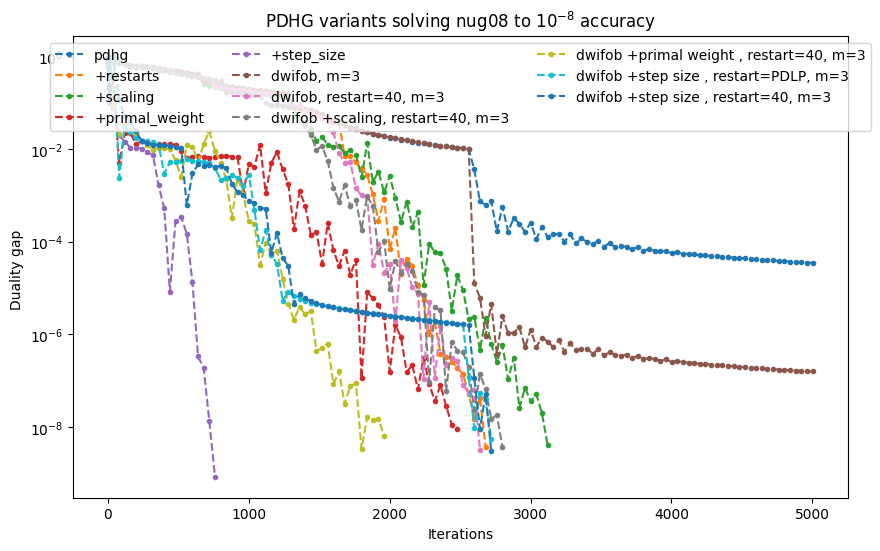

In [7]:
# Comparing summary of results on the accuracy of 1e-8 instead:  

# Plotting the baseline convergence results for accuracy=1e-4
solve_pdhg = plot_info_nug08_1e8["nug08-3rd_baseline_pdhg_1e-8"]
solve_pdhg_restarts = plot_info_nug08_1e8["nug08-3rd_baseline_+restarts_1e-8"]
solve_pdhg_scaling = plot_info_nug08_1e8["nug08-3rd_baseline_+scaling_1e-8"]
solve_pdhg_primal_weight = plot_info_nug08_1e8["nug08-3rd_baseline_+primal_weight_1e-8"]
solve_pdhg_step_size = plot_info_nug08_1e8["nug08-3rd_baseline_+step_size_1e-8"]

plt.figure(figsize=(10, 6))
plt.plot(solve_pdhg["iterations"][1:], solve_pdhg["rel_duality_gap"][1:], ".--", label="pdhg")
plt.plot(solve_pdhg_restarts["iterations"][1:], solve_pdhg_restarts["rel_duality_gap"][1:], ".--", label="+restarts")
plt.plot(solve_pdhg_scaling["iterations"][1:], solve_pdhg_scaling["rel_duality_gap"][1:], ".--", label="+scaling")
plt.plot(solve_pdhg_primal_weight["iterations"][1:], solve_pdhg_primal_weight["rel_duality_gap"][1:], ".--", label="+primal_weight")
plt.plot(solve_pdhg_step_size["iterations"][1:], solve_pdhg_step_size["rel_duality_gap"][1:], ".--", label="+step_size")

# We only select the best performing DWIFOB variant for each improvement, to reduce clutter: 
# Often this is the one with m=3 or m=4, which indicates that this is a reasonable choice of m for this problem size.
# Vanilla dwifob: 
solve_dwifob_m3 = plot_info_nug08_1e8["nug08-3rd_dwifob_1e-8_m=3"]
plt.plot(solve_dwifob_m3["iterations"][1:], solve_dwifob_m3["rel_duality_gap"][1:], ".--", label="dwifob, m=3")

# The best (? fastest in seconds) restart version of dwifob: constant restarts every 40 iterations, and m=3.
solve_dwifob_restart40_m3 = plot_info_nug08_1e8["nug08-3rd_dwifob_+restarts_restart=40_1e-8_m=3"]
plt.plot(solve_dwifob_restart40_m3["iterations"][1:], solve_dwifob_restart40_m3["rel_duality_gap"][1:], ".--", label="dwifob, restart=40, m=3")

# The fastest scaled version of dwifob: r=40, m=3 still.
solve_dwifob_scaled_r40_m3 = plot_info_nug08_1e8["nug08-3rd_dwifob_+scaling_restart=40_1e-8_m=3"]
plt.plot(solve_dwifob_scaled_r40_m3["iterations"][1:], solve_dwifob_scaled_r40_m3["rel_duality_gap"][1:], ".--", label="dwifob +scaling, restart=40, m=3")

# One of the fastest versions of dwifob+ primal weight update: r=40, m=3
solve_dwifob_primal_update_r40_m3 = plot_info_nug08_1e8["nug08-3rd_dwifob_+primal_weight_restart=40_1e-8_m=3"]
plt.plot(solve_dwifob_primal_update_r40_m3["iterations"][1:], solve_dwifob_primal_update_r40_m3["rel_duality_gap"][1:], ".--", label="dwifob +primal weight , restart=40, m=3")

# One of the fastest versions of dwifob+restarts: r=PDLP, m=3
solve_dwifob_step_size_rPDLP_m3 = plot_info_nug08_1e8["nug08-3rd_dwifob_+step_size_restart=PDLP_1e-8_m=3"]
plt.plot(solve_dwifob_step_size_rPDLP_m3["iterations"][1:], solve_dwifob_step_size_rPDLP_m3["rel_duality_gap"][1:], ".--", label="dwifob +step size , restart=PDLP, m=3")

# One of the fastest versions of dwifob+restarts: r=40, m=3
solve_dwifob_step_size_r40_m3 = plot_info_nug08_1e8["nug08-3rd_dwifob_+step_size_restart=40_1e-8_m=3"]
plt.plot(solve_dwifob_step_size_r40_m3["iterations"][1:], solve_dwifob_step_size_r40_m3["rel_duality_gap"][1:], ".--", label="dwifob +step size , restart=40, m=3")

plt.xlabel("Iterations") 
plt.ylabel("Duality gap ")
plt.yscale('log')
plt.title("PDHG variants solving nug08 to $10^{-8}$ accuracy")
plt.legend(loc="upper center", ncol=3);

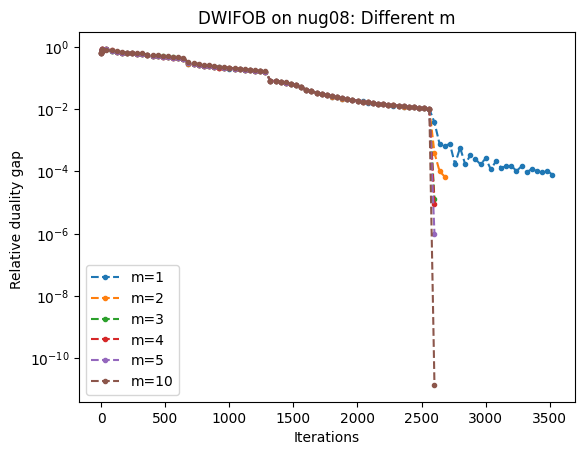

In [8]:
# Plotting an example, different values of m for fast dwifob on the nug08-3rd dataset: 
nug08_m1 = plot_info_nug08_1e4["nug08-3rd_dwifob_1e-4_m=1"]
nug08_m2 = plot_info_nug08_1e4["nug08-3rd_dwifob_1e-4_m=2"]
nug08_m3 = plot_info_nug08_1e4["nug08-3rd_dwifob_1e-4_m=3"]
nug08_m4 = plot_info_nug08_1e4["nug08-3rd_dwifob_1e-4_m=4"]
nug08_m5 = plot_info_nug08_1e4["nug08-3rd_dwifob_1e-4_m=5"]
nug08_m10 = plot_info_nug08_1e4["nug08-3rd_dwifob_1e-4_m=10"]

plt.plot(nug08_m1["iterations"][1:], nug08_m1["rel_duality_gap"][1:], ".--", label="m=1")
plt.plot(nug08_m2["iterations"][1:], nug08_m2["rel_duality_gap"][1:], ".--", label="m=2")
plt.plot(nug08_m3["iterations"][1:], nug08_m3["rel_duality_gap"][1:], ".--", label="m=3")
plt.plot(nug08_m4["iterations"][1:], nug08_m4["rel_duality_gap"][1:], ".--", label="m=4")
plt.plot(nug08_m5["iterations"][1:], nug08_m5["rel_duality_gap"][1:], ".--", label="m=5")
plt.plot(nug08_m10["iterations"][1:], nug08_m10["rel_duality_gap"][1:], ".--", label="m=10")

plt.xlabel("Iterations")
plt.ylabel("Relative duality gap ")
plt.yscale('log')
plt.title("DWIFOB on nug08: Different m")
plt.legend();

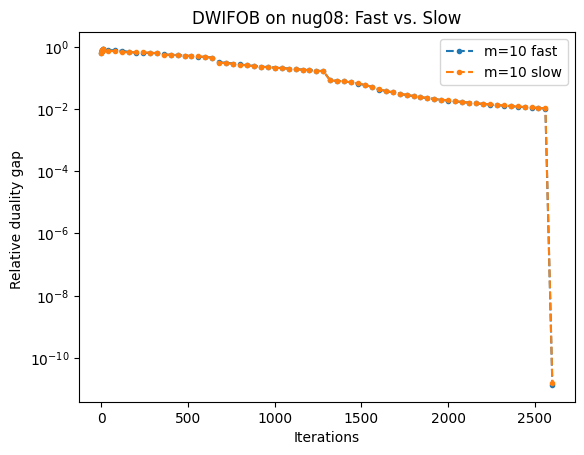

In [9]:
# Comparing slow and fast implementations of DWIFOB: 
dwifob_m3_fast = plot_info_nug08_1e4["nug08-3rd_dwifob_1e-4_m=3"]
dwifob_m10_fast = plot_info_nug08_1e4["nug08-3rd_dwifob_1e-4_m=10"]

dwifob_m3_slow = plot_info_nug08_1e4["nug08-3rd_dwifob_slow_1e-4_m=3"]
dwifob_m10_slow = plot_info_nug08_1e4["nug08-3rd_dwifob_slow_1e-4_m=10"]

# When plotting both, it is difficult to see the difference. 
# plt.plot(dwifob_m3_fast["iterations"][1:], dwifob_m3_fast["rel_duality_gap"][1:], ".--", label="m=3 fast")
# plt.plot(dwifob_m3_slow["iterations"][1:], dwifob_m3_slow["rel_duality_gap"][1:], ".--", label="m=3 slow")

plt.plot(dwifob_m10_fast["iterations"][1:], dwifob_m10_fast["rel_duality_gap"][1:], ".--", label="m=10 fast")
plt.plot(dwifob_m10_slow["iterations"][1:], dwifob_m10_slow["rel_duality_gap"][1:], ".--", label="m=10 slow")

# Plotting the difference instead: 
# diff_m3 = []
# for fast_gap, slow_gap in zip(dwifob_m3_fast["rel_duality_gap"], dwifob_m3_slow["rel_duality_gap"]):
#     diff_m3.append(fast_gap - slow_gap)
# plt.plot(dwifob_m3_fast["iterations"][1:], diff_m3[1:], ".", label="m=3 (fast - slow)")

# diff_m10 = []
# for fast_gap, slow_gap in zip(dwifob_m10_fast["rel_duality_gap"], dwifob_m10_slow["rel_duality_gap"]):
#     diff_m10.append(fast_gap - slow_gap)
# plt.plot(dwifob_m3_fast["iterations"][1:], diff_m10[1:], ".", label="m=10 (fast - slow)")


plt.xlabel("Iterations")
plt.ylabel("Relative duality gap ")
plt.yscale('log')
plt.title("DWIFOB on nug08: Fast vs. Slow")
plt.legend();

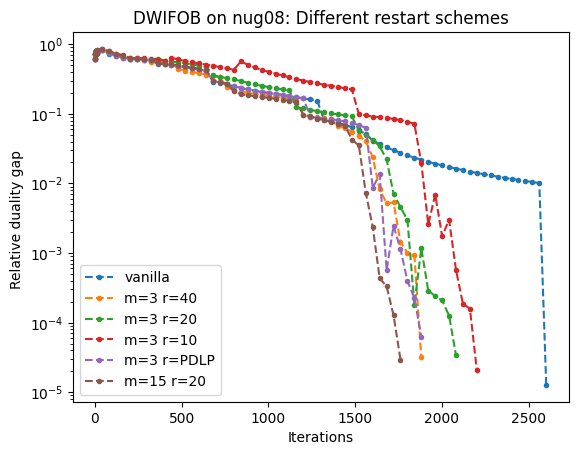

In [10]:
# Comparing different restart schemes: 
dwifob_no_restart_m3 = plot_info_nug08_1e4["nug08-3rd_dwifob_1e-4_m=3"]
dwifob_restart40_m3 = plot_info_nug08_1e4["nug08-3rd_dwifob_+restarts_restart=40_1e-4_m=3"]
dwifob_restart20_m3 = plot_info_nug08_1e4["nug08-3rd_dwifob_+restarts_restart=20_1e-4_m=3"]
dwifob_restart10_m3 = plot_info_nug08_1e4["nug08-3rd_dwifob_+restarts_restart=10_1e-4_m=3"]
dwifob_restartPDLP_m3 = plot_info_nug08_1e4["nug08-3rd_dwifob_+restarts_restart=PDLP_1e-4_m=3"]

plt.plot(dwifob_no_restart_m3["iterations"][1:], dwifob_no_restart_m3["rel_duality_gap"][1:], ".--", label="vanilla")
plt.plot(dwifob_restart40_m3["iterations"][1:], dwifob_restart40_m3["rel_duality_gap"][1:], ".--", label="m=3 r=40")
plt.plot(dwifob_restart20_m3["iterations"][1:], dwifob_restart20_m3["rel_duality_gap"][1:], ".--", label="m=3 r=20")
plt.plot(dwifob_restart10_m3["iterations"][1:], dwifob_restart10_m3["rel_duality_gap"][1:], ".--", label="m=3 r=10")
plt.plot(dwifob_restartPDLP_m3["iterations"][1:], dwifob_restartPDLP_m3["rel_duality_gap"][1:], ".--", label="m=3 r=PDLP")

# This one did very well for some reason, but was significantly slower in seconds:
dwifob_restart20_m15 = plot_info_nug08_1e4["nug08-3rd_dwifob_+restarts_restart=20_1e-4_m=15"]
plt.plot(dwifob_restart20_m15["iterations"][1:], dwifob_restart20_m15["rel_duality_gap"][1:], ".--", label="m=15 r=20")

plt.xlabel("Iterations")
plt.ylabel("Relative duality gap ")
plt.yscale('log')
plt.title("DWIFOB on nug08: Different restart schemes")
plt.legend();

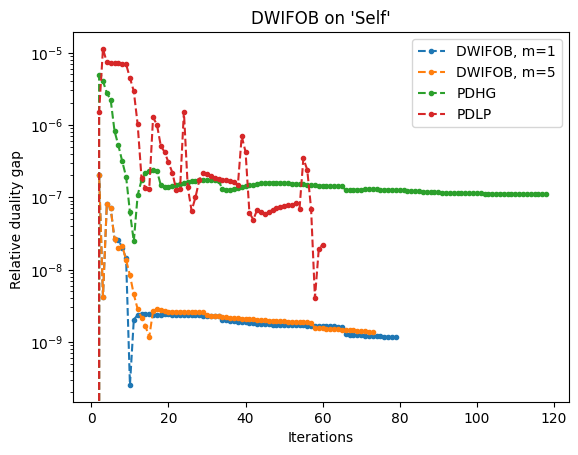

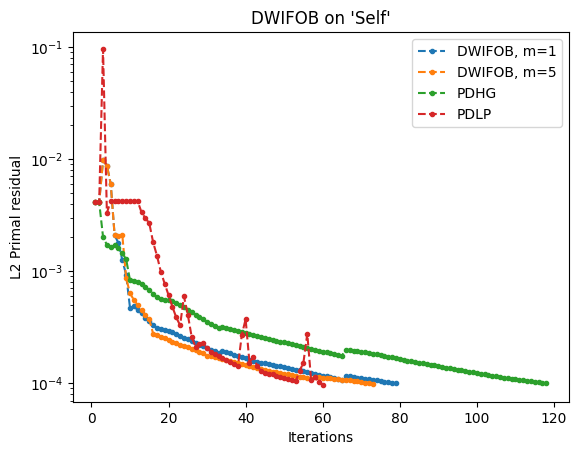

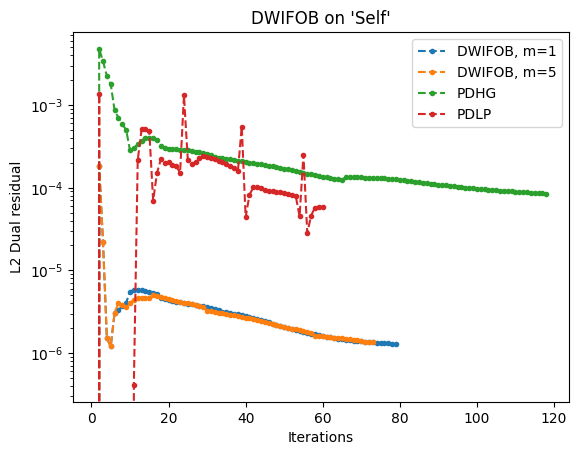

In [16]:
dwifob_self_solve_m1 = plot_info_self_1e4["self_dwifob_org_+primal_weight_restart=40_1e-4_m=1"]
dwifob_self_solve_m5 = plot_info_self_1e4["self_dwifob_org_+primal_weight_restart=40_1e-4_m=5"]
pdgh_self_solve = plot_info_self_1e4["self_baseline_pdhg_1e-4"]
pdlp_self_solve = plot_info_self_1e4["self_baseline_+step_size_1e-4"]

plt.plot(dwifob_self_solve_m1["iterations"], dwifob_self_solve_m1["rel_duality_gap"], ".--", label="DWIFOB, m=1")
plt.plot(dwifob_self_solve_m5["iterations"], dwifob_self_solve_m5["rel_duality_gap"], ".--", label="DWIFOB, m=5")
plt.plot(pdgh_self_solve["iterations"], pdgh_self_solve["rel_duality_gap"], ".--", label="PDHG")
plt.plot(pdlp_self_solve["iterations"], pdlp_self_solve["rel_duality_gap"], ".--", label="PDLP")

plt.xlabel("Iterations")
plt.ylabel("Relative duality gap ")
plt.yscale('log')
plt.title("DWIFOB on 'Self'")
plt.legend();

plt.figure()
plt.plot(dwifob_self_solve_m1["iterations"], dwifob_self_solve_m1["l2_primal_residual"], ".--", label="DWIFOB, m=1")
plt.plot(dwifob_self_solve_m5["iterations"], dwifob_self_solve_m5["l2_primal_residual"], ".--", label="DWIFOB, m=5")
plt.plot(pdgh_self_solve["iterations"], pdgh_self_solve["l2_primal_residual"], ".--", label="PDHG")
plt.plot(pdlp_self_solve["iterations"], pdlp_self_solve["l2_primal_residual"], ".--", label="PDLP")
plt.xlabel("Iterations")
plt.ylabel("L2 Primal residual")
plt.yscale('log')
plt.title("DWIFOB on 'Self'")
plt.legend();

plt.figure()
plt.plot(dwifob_self_solve_m1["iterations"], dwifob_self_solve_m1["l2_dual_residual"], ".--", label="DWIFOB, m=1")
plt.plot(dwifob_self_solve_m5["iterations"], dwifob_self_solve_m5["l2_dual_residual"], ".--", label="DWIFOB, m=5")
plt.plot(pdgh_self_solve["iterations"], pdgh_self_solve["l2_dual_residual"], ".--", label="PDHG")
plt.plot(pdlp_self_solve["iterations"], pdlp_self_solve["l2_dual_residual"], ".--", label="PDLP")
plt.xlabel("Iterations")
plt.ylabel("L2 Dual residual")
plt.yscale('log')
plt.title("DWIFOB on 'Self'")
plt.legend();

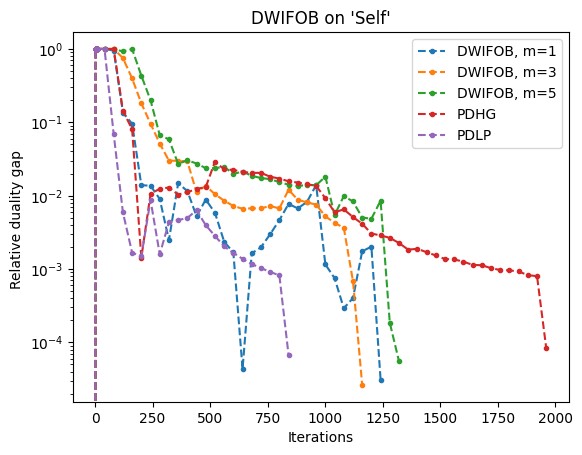

In [8]:
# Visualizing the results on 'savsched1':
dwifob_savsched1_solve_m1 = plot_info_savsched1_1e4["savsched1_dwifob_org_+primal_weight_restart=40_terminationfreq=40_1e-4_m=1"]
dwifob_savsched1_solve_m3 = plot_info_savsched1_1e4["savsched1_dwifob_org_+primal_weight_restart=40_terminationfreq=40_1e-4_m=3"]
dwifob_savsched1_solve_m5 = plot_info_savsched1_1e4["savsched1_dwifob_org_+primal_weight_restart=40_terminationfreq=40_1e-4_m=5"]
pdgh_savsched1_solve = plot_info_savsched1_1e4["savsched1_baseline_+primal_weight_termination_freq_40_1e-4"]
pdlp_savsched1_solve = plot_info_savsched1_1e4["savsched1_baseline_+step_size_termination_freq_40_1e-4"]

plt.plot(dwifob_savsched1_solve_m1["iterations"], dwifob_savsched1_solve_m1["rel_duality_gap"], ".--", label="DWIFOB, m=1")
plt.plot(dwifob_savsched1_solve_m3["iterations"], dwifob_savsched1_solve_m3["rel_duality_gap"], ".--", label="DWIFOB, m=3")
plt.plot(dwifob_savsched1_solve_m5["iterations"], dwifob_savsched1_solve_m5["rel_duality_gap"], ".--", label="DWIFOB, m=5")
plt.plot(pdgh_savsched1_solve["iterations"], pdgh_savsched1_solve["rel_duality_gap"], ".--", label="PDHG")
plt.plot(pdlp_savsched1_solve["iterations"], pdlp_savsched1_solve["rel_duality_gap"], ".--", label="PDLP")

plt.xlabel("Iterations")
plt.ylabel("Relative duality gap ")
plt.yscale('log')
plt.title("DWIFOB on 'Self'")
plt.legend();

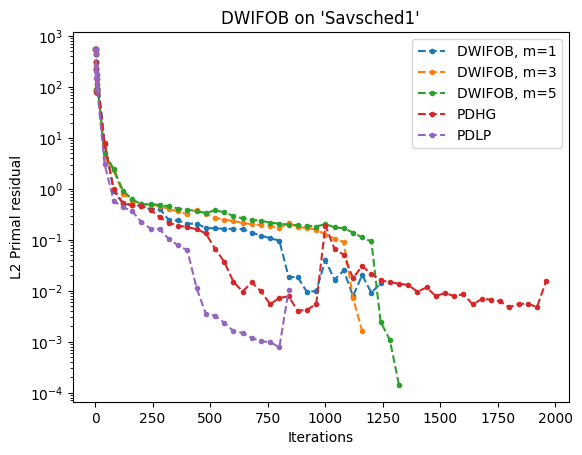

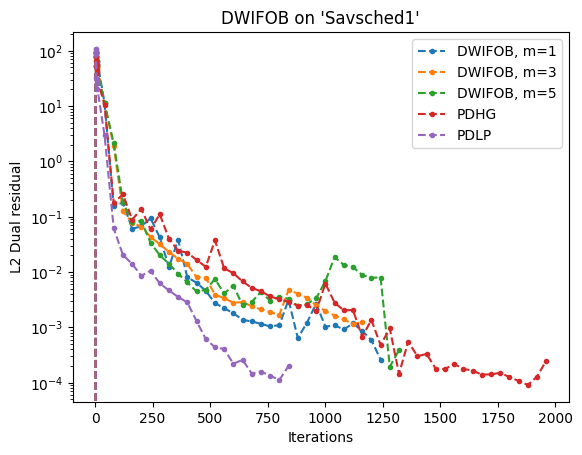

In [10]:

plt.figure()
plt.plot(dwifob_savsched1_solve_m1["iterations"], dwifob_savsched1_solve_m1["l2_primal_residual"], ".--", label="DWIFOB, m=1")
plt.plot(dwifob_savsched1_solve_m3["iterations"], dwifob_savsched1_solve_m3["l2_primal_residual"], ".--", label="DWIFOB, m=3")
plt.plot(dwifob_savsched1_solve_m5["iterations"], dwifob_savsched1_solve_m5["l2_primal_residual"], ".--", label="DWIFOB, m=5")
plt.plot(pdgh_savsched1_solve["iterations"], pdgh_savsched1_solve["l2_primal_residual"], ".--", label="PDHG")
plt.plot(pdlp_savsched1_solve["iterations"], pdlp_savsched1_solve["l2_primal_residual"], ".--", label="PDLP")
plt.xlabel("Iterations")
plt.ylabel("L2 Primal residual")
plt.yscale('log')
plt.title("DWIFOB on 'Savsched1'")
plt.legend();

plt.figure()
plt.plot(dwifob_savsched1_solve_m1["iterations"], dwifob_savsched1_solve_m1["l2_dual_residual"], ".--", label="DWIFOB, m=1")
plt.plot(dwifob_savsched1_solve_m3["iterations"], dwifob_savsched1_solve_m3["l2_dual_residual"], ".--", label="DWIFOB, m=3")
plt.plot(dwifob_savsched1_solve_m5["iterations"], dwifob_savsched1_solve_m5["l2_dual_residual"], ".--", label="DWIFOB, m=5")
plt.plot(pdgh_savsched1_solve["iterations"], pdgh_savsched1_solve["l2_dual_residual"], ".--", label="PDHG")
plt.plot(pdlp_savsched1_solve["iterations"], pdlp_savsched1_solve["l2_dual_residual"], ".--", label="PDLP")
plt.xlabel("Iterations")
plt.ylabel("L2 Dual residual")
plt.yscale('log')
plt.title("DWIFOB on 'Savsched1'")
plt.legend();

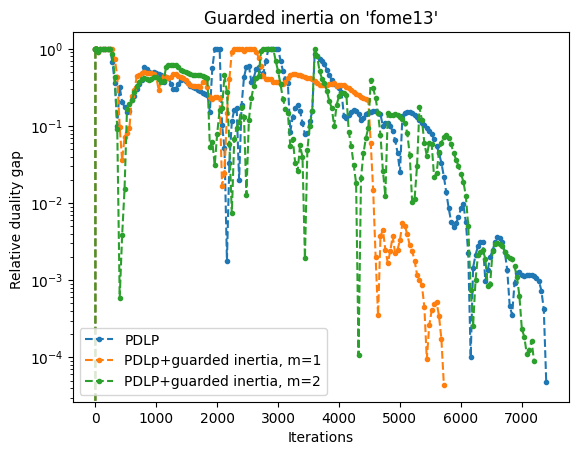

In [7]:
# Visualizing the results on 'savsched1':
fome13_solve_m0 = plot_info_others_1e4["fome13_+step_size_inertial_PDHG_1e-4_m=0"]
fome13_solve_m1 = plot_info_others_1e4["fome13_+step_size_inertial_PDHG_1e-4_m=1"]
fome13_solve_m2 = plot_info_others_1e4["fome13_+step_size_inertial_PDHG_1e-4_m=2"]

plt.plot(fome13_solve_m0["iterations"], fome13_solve_m0["rel_duality_gap"], ".--", label="PDLP")
plt.plot(fome13_solve_m1["iterations"], fome13_solve_m1["rel_duality_gap"], ".--", label="PDLp+guarded inertia, m=1")
plt.plot(fome13_solve_m2["iterations"], fome13_solve_m2["rel_duality_gap"], ".--", label="PDLP+guarded inertia, m=2")

plt.xlabel("Iterations")
plt.ylabel("Relative duality gap ")
plt.yscale('log')
plt.title("Guarded inertia on 'fome13'")
plt.legend();

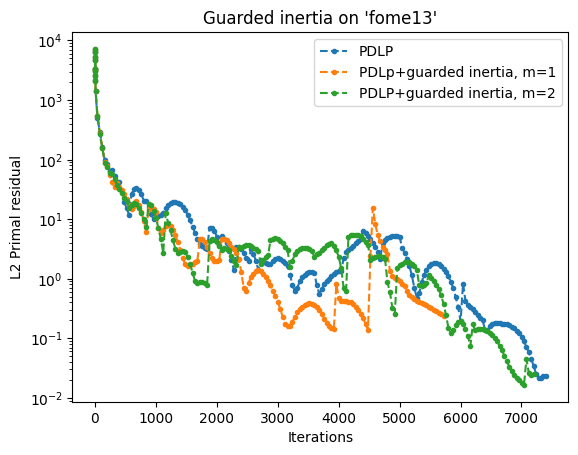

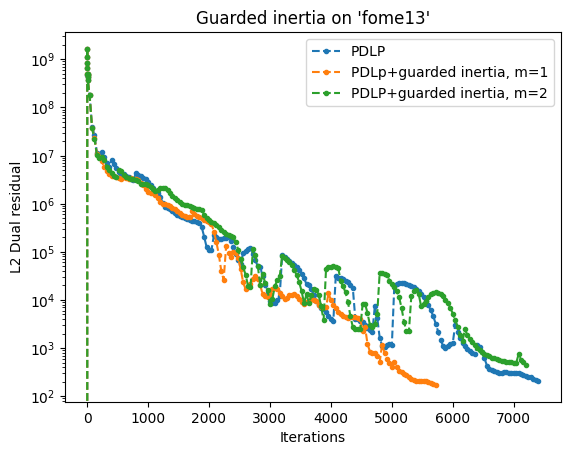

In [ ]:
plt.figure()
plt.plot(fome13_solve_m0["iterations"], fome13_solve_m0["l2_primal_residual"], ".--", label="PDLP")
plt.plot(fome13_solve_m1["iterations"], fome13_solve_m1["l2_primal_residual"], ".--", label="PDLp+guarded inertia, m=1")
plt.plot(fome13_solve_m2["iterations"], fome13_solve_m2["l2_primal_residual"], ".--", label="PDLP+guarded inertia, m=2")

plt.xlabel("Iterations")
plt.ylabel("L2 Primal residual")
plt.yscale('log')
plt.title("Guarded inertia on 'fome13'")
plt.legend();

plt.figure()
plt.plot(fome13_solve_m0["iterations"], fome13_solve_m0["l2_dual_residual"], ".--", label="PDLP")
plt.plot(fome13_solve_m1["iterations"], fome13_solve_m1["l2_dual_residual"], ".--", label="PDLp+guarded inertia, m=1")
plt.plot(fome13_solve_m2["iterations"], fome13_solve_m2["l2_dual_residual"], ".--", label="PDLP+guarded inertia, m=2")

plt.xlabel("Iterations")
plt.ylabel("L2 Dual residual")
plt.yscale('log')
plt.title("Guarded inertia on 'fome13'")
plt.legend();

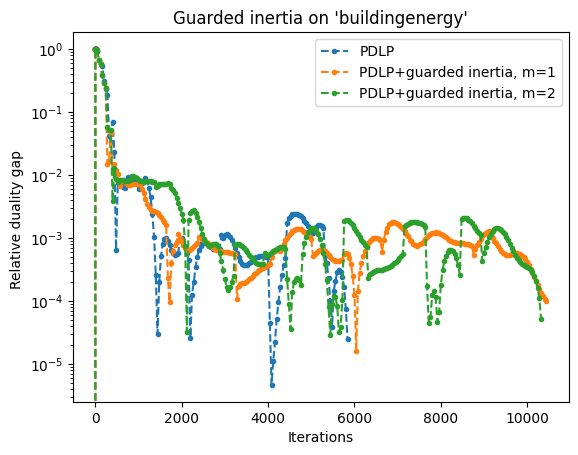

In [11]:
# Visualizing the results on 'savsched1':
buildingenergy_solve_m0 = plot_info_others_1e4["buildingenergy_+step_size_inertial_PDHG_1e-4_m=0"]
buildingenergy_solve_m1 = plot_info_others_1e4["buildingenergy_+step_size_inertial_PDHG_1e-4_m=1"]
buildingenergy_solve_m2 = plot_info_others_1e4["buildingenergy_+step_size_inertial_PDHG_1e-4_m=2"]

plt.plot(buildingenergy_solve_m0["iterations"], buildingenergy_solve_m0["rel_duality_gap"], ".--", label="PDLP")
plt.plot(buildingenergy_solve_m1["iterations"], buildingenergy_solve_m1["rel_duality_gap"], ".--", label="PDLP+guarded inertia, m=1")
plt.plot(buildingenergy_solve_m2["iterations"], buildingenergy_solve_m2["rel_duality_gap"], ".--", label="PDLP+guarded inertia, m=2")

plt.xlabel("Iterations")
plt.ylabel("Relative duality gap ")
plt.yscale('log')
plt.title("Guarded inertia on 'buildingenergy'")
plt.legend();

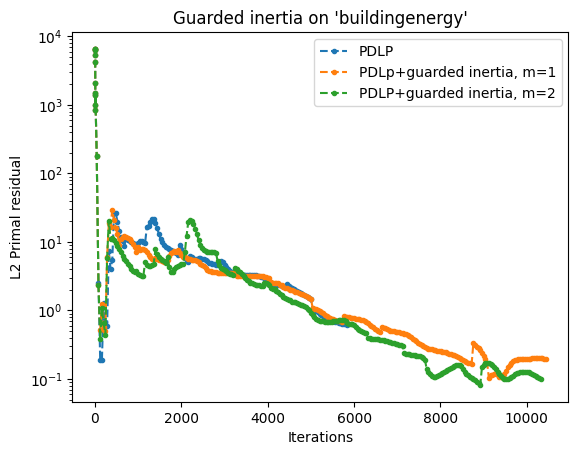

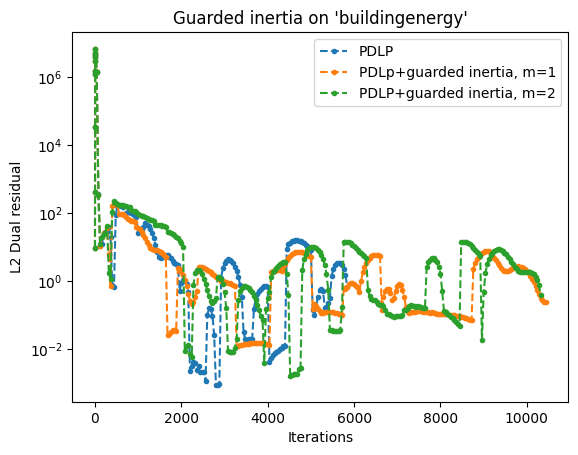

In [ ]:
plt.figure()
plt.plot(buildingenergy_solve_m0["iterations"], buildingenergy_solve_m0["l2_primal_residual"], ".--", label="PDLP")
plt.plot(buildingenergy_solve_m1["iterations"], buildingenergy_solve_m1["l2_primal_residual"], ".--", label="PDLP+guarded inertia, m=1")
plt.plot(buildingenergy_solve_m2["iterations"], buildingenergy_solve_m2["l2_primal_residual"], ".--", label="PDLP+guarded inertia, m=2")

plt.xlabel("Iterations")
plt.ylabel("L2 Primal residual")
plt.yscale('log')
plt.title("Guarded inertia on 'buildingenergy'")
plt.legend();

plt.figure()
plt.plot(buildingenergy_solve_m0["iterations"], buildingenergy_solve_m0["l2_dual_residual"], ".--", label="PDLP")
plt.plot(buildingenergy_solve_m1["iterations"], buildingenergy_solve_m1["l2_dual_residual"], ".--", label="PDLP+guarded inertia, m=1")
plt.plot(buildingenergy_solve_m2["iterations"], buildingenergy_solve_m2["l2_dual_residual"], ".--", label="PDLP+guarded inertia, m=2")

plt.xlabel("Iterations")
plt.ylabel("L2 Dual residual")
plt.yscale('log')
plt.title("Guarded inertia on 'buildingenergy'")
plt.legend();